In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn import tree # For visualizing the decision tree

In [24]:
# Load the Iris dataset directly from Scikit-learn's built-in datasets
iris = load_iris()
X = iris.data
y = iris.target

#Display the first few rows of data and target names
print("Features (X) shape:", X.shape)
print("Labels (y) shape:", y.shape)
print("Feature names:", iris.feature_names)
print("Target names (species):", iris.target_names)
print("\nFirst 5 samples of features:\n", X[:5])
print("\nFirst 5 samples of labels:\n", y[:5])

Features (X) shape: (150, 4)
Labels (y) shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (species): ['setosa' 'versicolor' 'virginica']

First 5 samples of features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 samples of labels:
 [0 0 0 0 0]


In [25]:
if pd.DataFrame(X).isnull().sum().sum() == 0:
  print("\nNo missing values found in the Iris dataset.")
else:
   print("\nMissing values detected. Further preprocessing might be needed.")


No missing values found in the Iris dataset.


In [26]:
# The target labels 'y' are already numerically encoded by load_iris() (0, 1, 2)
# corresponding to the three iris species.
print("Labels are already numerically encoded (0, 1, 2).")

Labels are already numerically encoded (0, 1, 2).


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 105 samples
Testing set size: 45 samples


In [28]:
# Instantiate the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
print("\nTraining Decision Tree Classifier...")
dt_classifier.fit(X_train, y_train)
print("Training complete.")


Training Decision Tree Classifier...
Training complete.


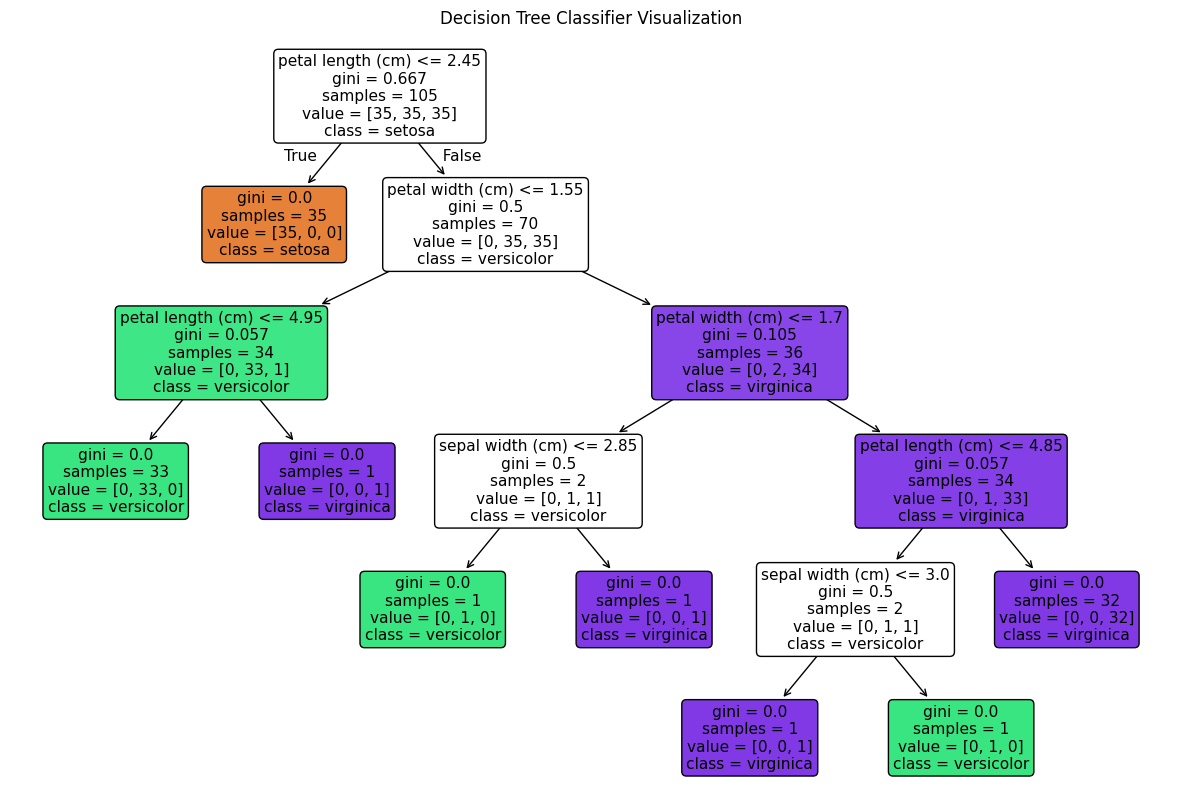

In [29]:
#  Visualize the trained Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Classifier Visualization")
plt.show()

In [30]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
# For precision and recall in a multiclass scenario, 'average' parameter is needed.
# 'weighted' accounts for label imbalance by calculating metrics for each label,
# and finding their average weighted by support (the number of true instances for each label).
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")


Model Evaluation on Test Set:
Accuracy: 0.9333
Precision (weighted): 0.9444
Recall (weighted): 0.9333
